In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [3]:
af = pd.read_csv('audio_features.csv')

In [4]:
af.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0,0.735,0.444,10,-10.519,1,0.0684,0.2040,0.001200,0.1700,0.0984,97.038,audio_features,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,https://api.spotify.com/v1/tracks/4g2c7NoTWAOS...,https://api.spotify.com/v1/audio-analysis/4g2c...,202396,4,midnights
1,1,0.658,0.378,7,-8.300,1,0.0379,0.0593,0.000000,0.0976,0.0382,108.034,audio_features,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,https://api.spotify.com/v1/tracks/199E1RRrVmVT...,https://api.spotify.com/v1/audio-analysis/199E...,218271,4,midnights
2,2,0.638,0.634,4,-6.582,1,0.0457,0.1330,0.000001,0.1520,0.5190,96.953,audio_features,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,https://api.spotify.com/v1/tracks/02Zkkf2zMkwR...,https://api.spotify.com/v1/audio-analysis/02Zk...,200690,4,midnights
3,3,0.659,0.323,9,-13.425,1,0.0436,0.7350,0.003210,0.1160,0.1540,110.007,audio_features,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,https://api.spotify.com/v1/tracks/6ADDIJxxqzM9...,https://api.spotify.com/v1/audio-analysis/6ADD...,256124,4,midnights
4,4,0.694,0.380,2,-10.307,1,0.0614,0.4160,0.000008,0.1260,0.3760,120.044,audio_features,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,https://api.spotify.com/v1/tracks/7gVWKBcfIW93...,https://api.spotify.com/v1/audio-analysis/7gVW...,194207,4,midnights


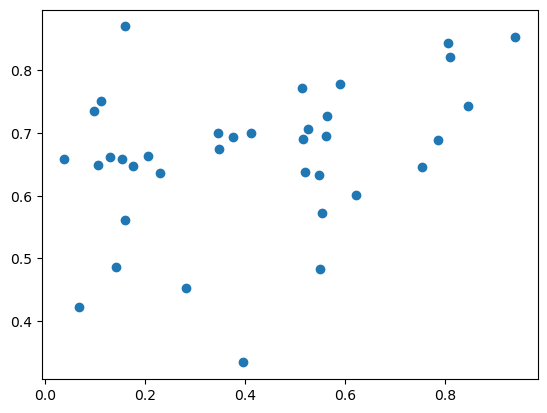

In [7]:
fig1, ax1 = plt.subplots()
ax1.scatter(x = af['valence'], y = af['danceability'])

plt.show()

In [8]:
result = stats.pearsonr(af['valence'], af['danceability'])

In [9]:
result

PearsonRResult(statistic=0.3463159174909147, pvalue=0.038538653490464814)

In [12]:
round(result.statistic, 2)

0.35

In [14]:
round(result.pvalue, 3)

0.039

In [15]:
af.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'album'],
      dtype='object')

In [16]:
result_2 = stats.pearsonr(af['energy'], af['loudness'])

In [17]:
result_2.statistic

0.8379280443730848

In [25]:
round(result_2.pvalue, 9)

0.0

In [21]:
result_2.pvalue

1.834153975369603e-10

In [26]:
result_3 = stats.pearsonr(af['instrumentalness'], af['danceability'])
result_3.pvalue

0.18457021888983283

In [27]:
result_3.statistic

-0.22624015694187422

In [53]:
np.random.uniform()

0.8957477227762597

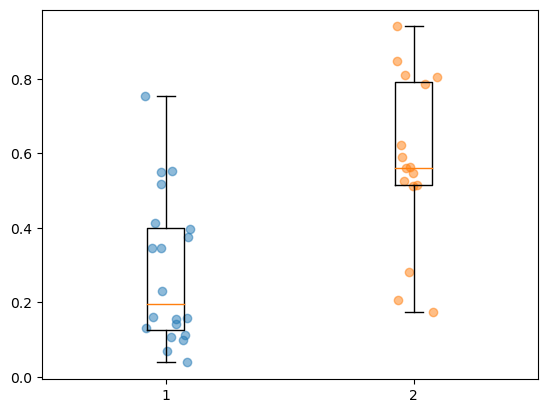

In [55]:
mid_valence = af[af['album'] == 'midnights']['valence']
lon_valence = af[af['album'] == 'loneliest']['valence']
mid_xs = [1] * len(mid_valence)
lon_xs = [2] * len(lon_valence)
mid_x_jitter = np.random.uniform(-0.10, .10, len(mid_xs))
lon_x_jitter = np.random.uniform(-.10, .10, len(lon_xs))

fig2, ax2 = plt.subplots()
ax2.boxplot(mid_valence, positions = [1])
ax2.boxplot(lon_valence, positions = [2])
ax2.scatter(mid_xs + mid_x_jitter, mid_valence, alpha = .5)
ax2.scatter(lon_xs + lon_x_jitter, lon_valence, alpha = .5)


plt.show()